# House Price Prediction

House price prediction using Linear Regression. The project contains
* Data Visualization
* Data Feature Engineering
* Selection of Features based on their correlation

In [58]:
import numpy as np
import pandas as pd

import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
from sklearn.datasets import fetch_california_housing

fetch_california_housing = fetch_california_housing()
X = fetch_california_housing.data
# Median House Value (in $100,000)
y = fetch_california_housing.target

data = pd.DataFrame(X, columns=fetch_california_housing.feature_names)
data["HouseValue"] = y # load_boston.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [60]:
# Description of the data
print(fetch_california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [61]:
# Shape of the data 
print(data.shape)

(20640, 9)


In [62]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   HouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [63]:
# Count the number of missing values in each column
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HouseValue    0
dtype: int64

### Visualizing Data

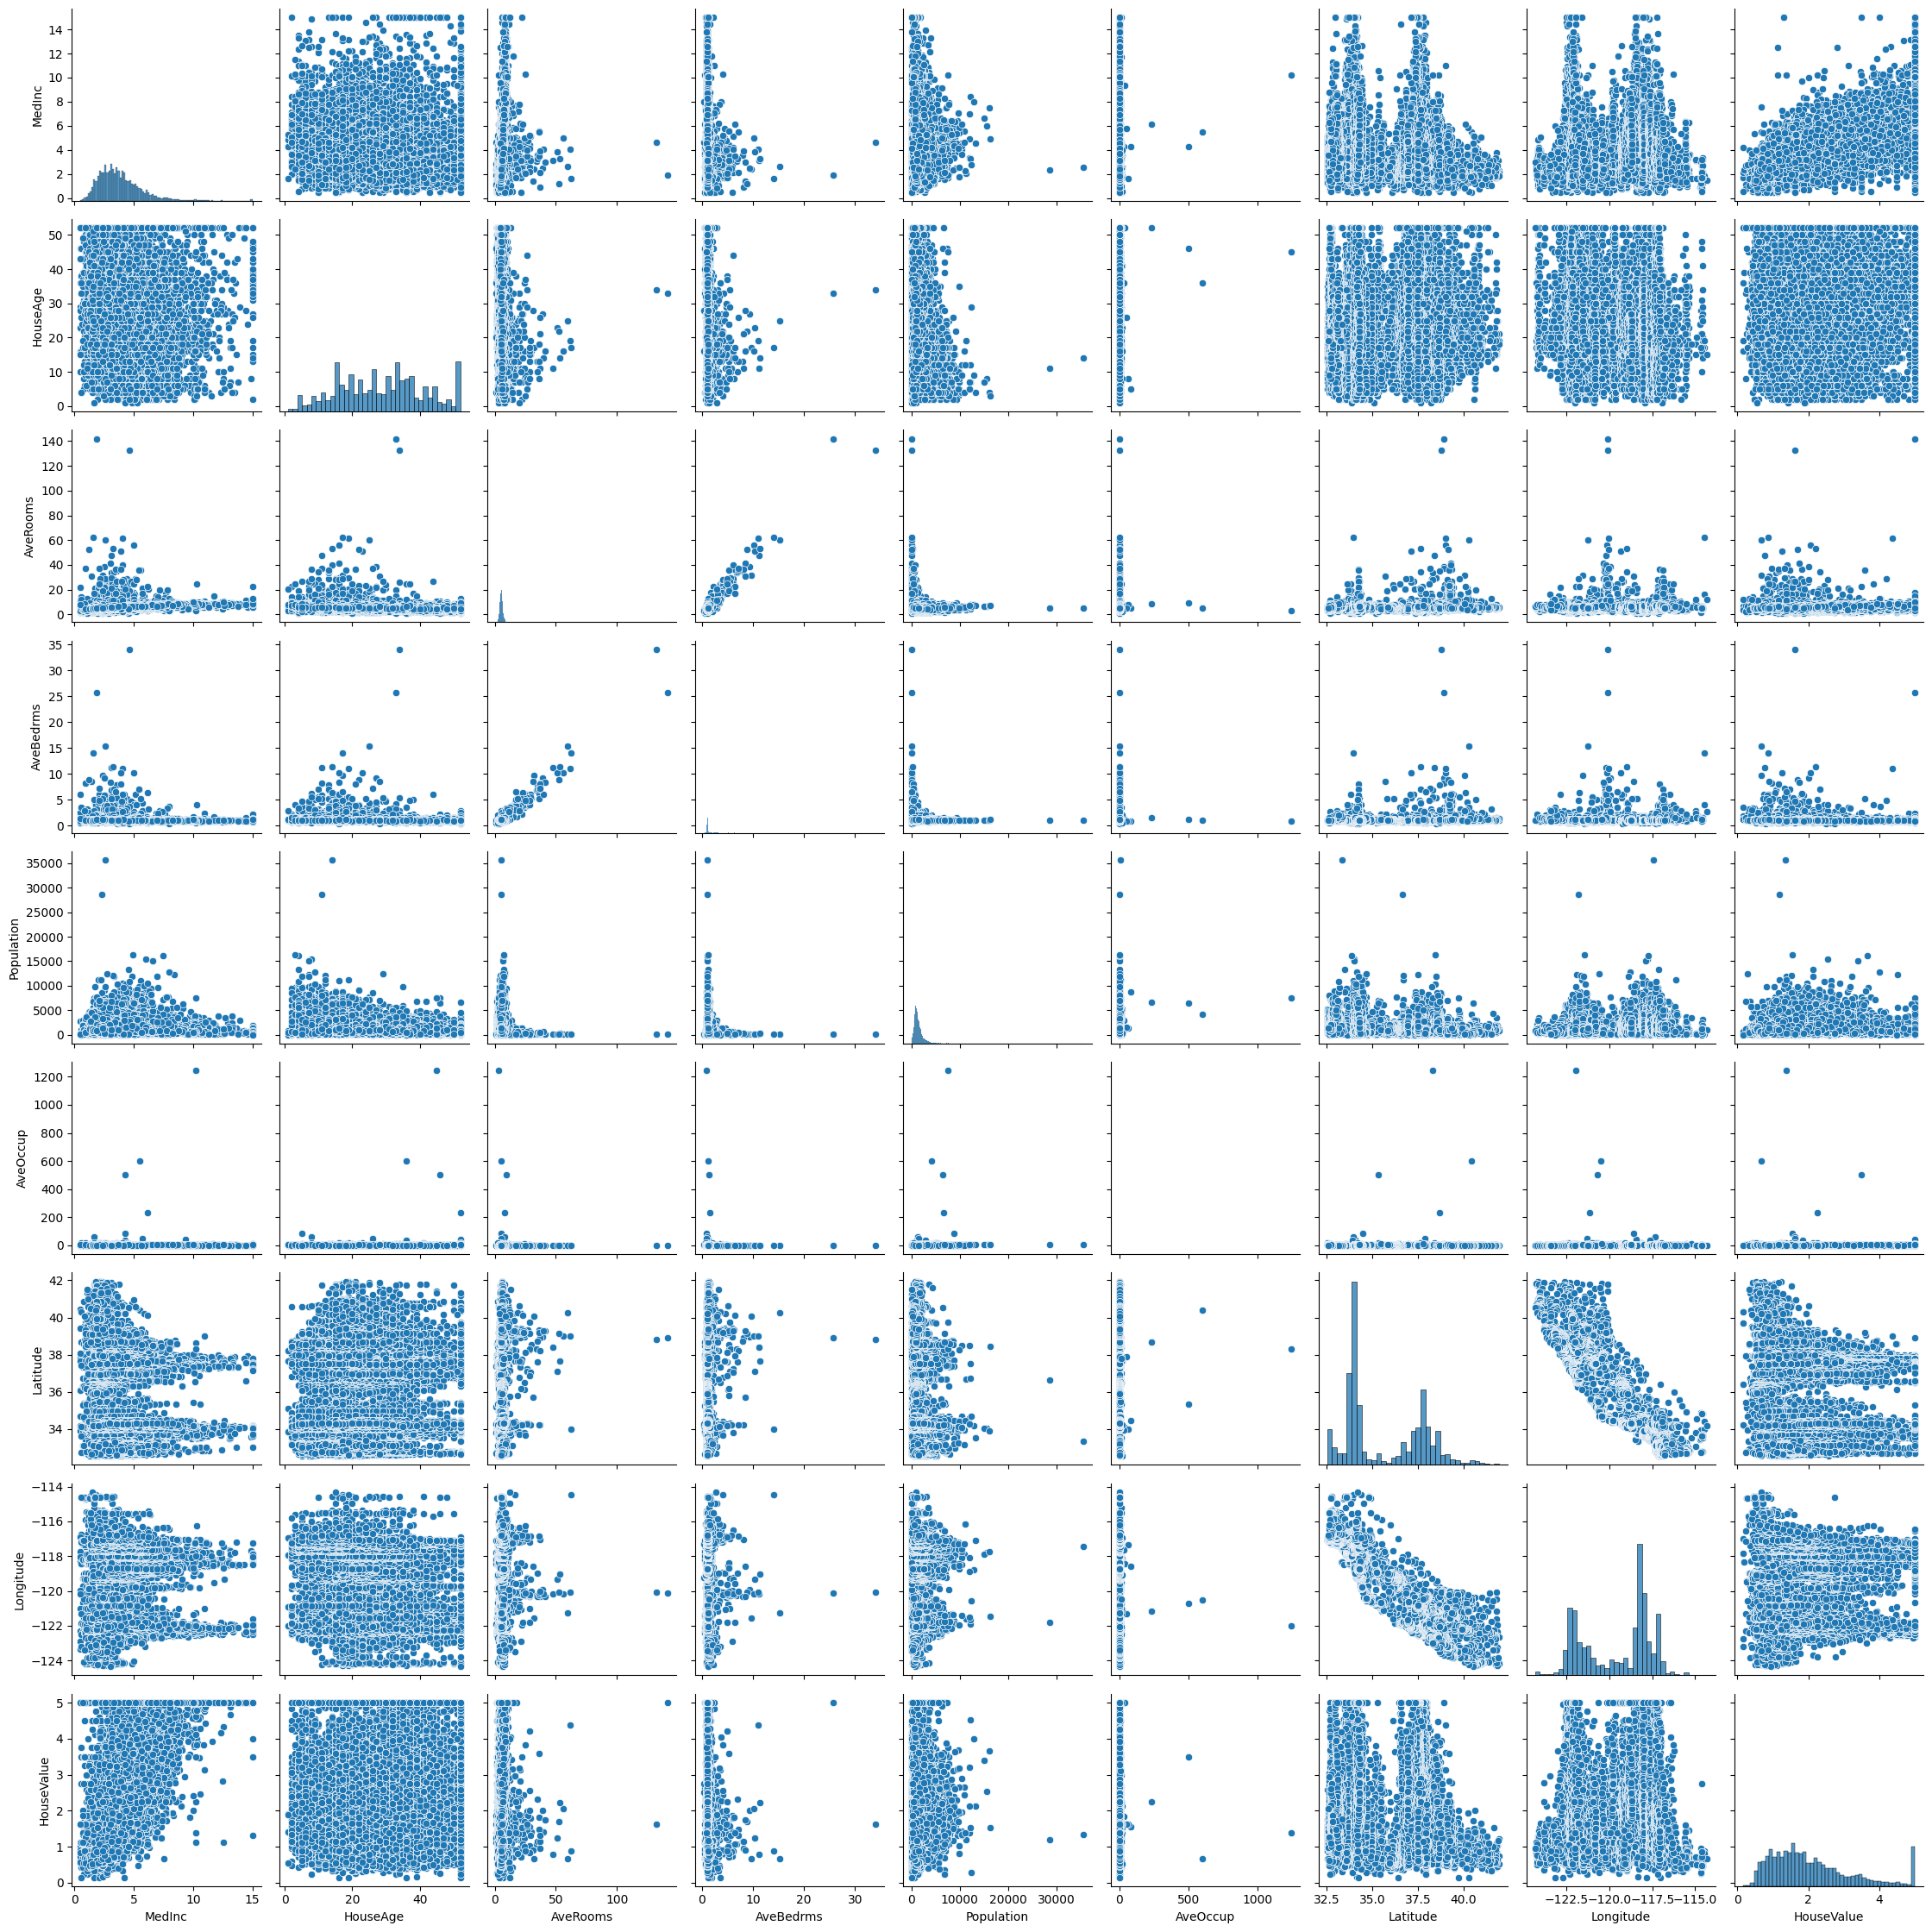

In [7]:
# A grid of scatter plots for each pair of variables in the data
sns.pairplot(data, height=2.5)
plt.tight_layout()

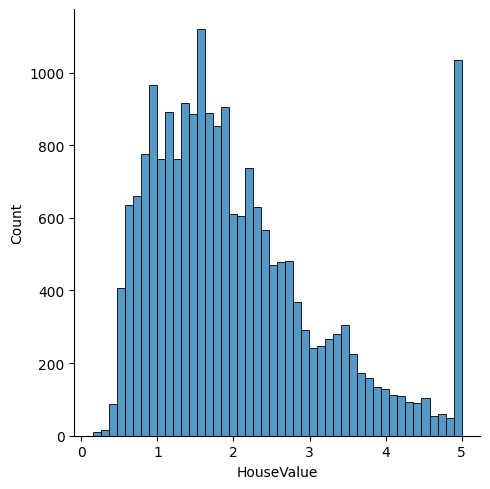

In [64]:
sns.displot(data["HouseValue"])

In [65]:
# Skewness and Kurtosis: To find the outliers (exceptions) later
print(data["HouseValue"].skew())
print(data["HouseValue"].kurtosis())

0.9777632739098345
0.3278702429465876


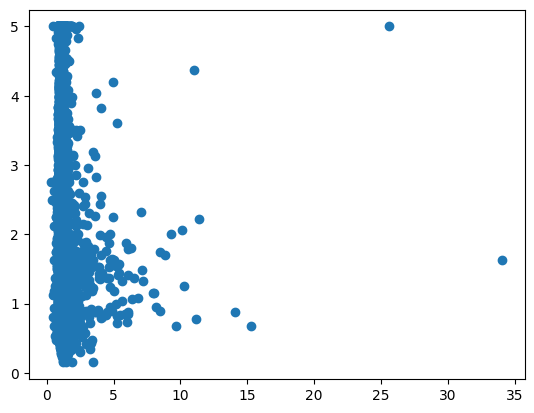

In [66]:
plt.scatter(data["AveBedrms"], data["HouseValue"])
plt.show()

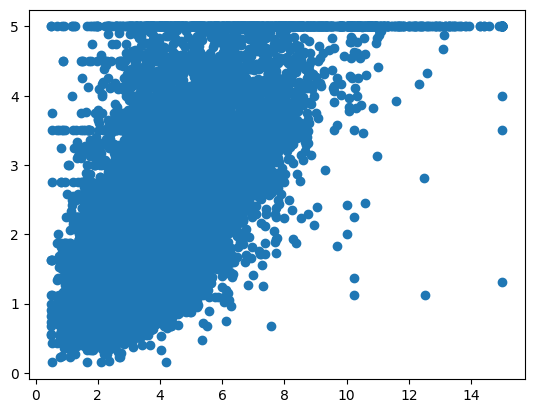

In [24]:
plt.scatter(data["MedInc"], data["HouseValue"])
plt.show()

<Axes: xlabel='HouseValue', ylabel='Density'>

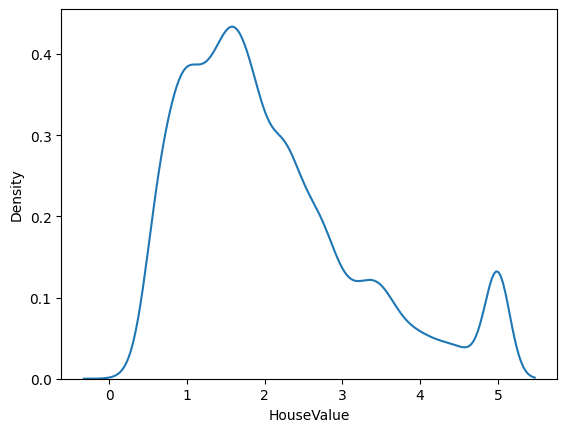

In [70]:
sns.kdeplot(data["HouseValue"])

<Axes: xlabel='HouseValue', ylabel='Density'>

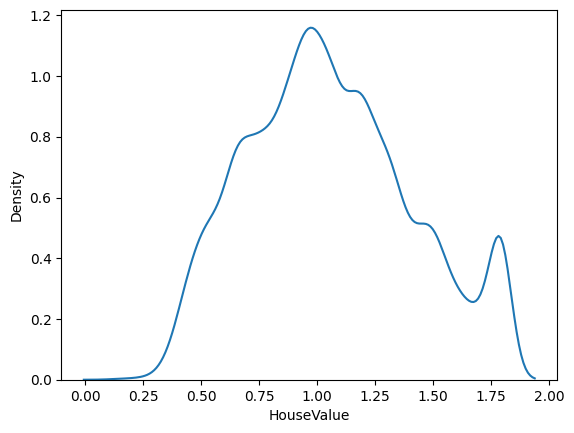

In [78]:
# Transform to right
data["HouseValue"] = np.log1p(data["HouseValue"])
sns.kdeplot(data["HouseValue"])

### Correlation

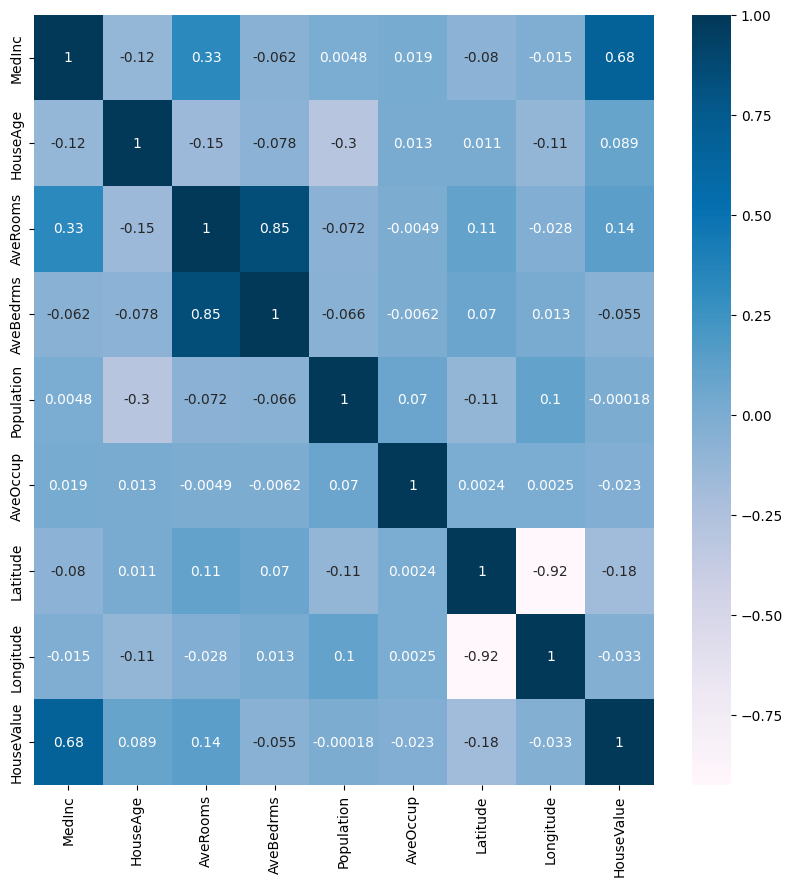

In [79]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [80]:
# Absolute value of correlation
cor_target = abs(cor["HouseValue"])

# Highly correlated features
relevant_features = cor_target[cor_target > 0.2]

print([x for x, v in relevant_features.items()])

['MedInc', 'HouseValue']


### Model Building

In [81]:
from sklearn.model_selection import train_test_split

X = data.drop("HouseValue", axis=1)
y = data["HouseValue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
print(X_train.shape) # Features to train
print(X_test.shape) # Features to test
print(y_train.shape) # Labels to train
print(y_test.shape) # Labels to test

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [83]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [111]:
predictions = lr.predict(X_test)

print("Actual value of the house: ", y_test[0])
print("Model Predicted value: ", predictions[0])

Actual value of the house:  1.7094642265012248
Model Predicted value:  0.6275833553422832


In [112]:
from sklearn.metrics import mean_squared_error

# Checking the Accuracy
mse = mean_squared_error(y_test, predictions)
print(mse)

0.05034011172872024
